In [2]:
#importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("insurance.csv")

<AxesSubplot:>

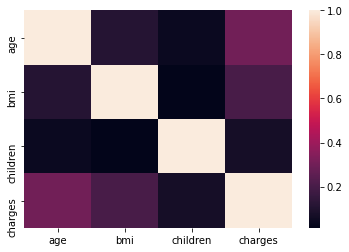

In [4]:
sns.heatmap(data.corr())

In [5]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [6]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [7]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
y_conc = y.copy()

print(x)
print(y)

[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 ...
 [18 'female' 36.85 0 'no' 'southeast']
 [21 'female' 25.8 0 'no' 'southwest']
 [61 'female' 29.07 0 'yes' 'northwest']]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [8]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

x[:, 1] = labelencoder.fit_transform(x[:, 1])
x[:, 4] = labelencoder.fit_transform(x[:, 4])
x[:, 5] = labelencoder.fit_transform(x[:, 5])
print(x[:, 1])
print(x[:, 4])
print(x[:, 5])
# print(x)
df1 = pd.DataFrame(x)
print(df1.to_string)
print(y)

[0 1 1 ... 0 0 0]
[1 0 0 ... 0 0 1]
[3 2 2 ... 2 3 1]
<bound method DataFrame.to_string of        0  1       2  3  4  5
0     19  0    27.9  0  1  3
1     18  1   33.77  1  0  2
2     28  1    33.0  3  0  2
3     33  1  22.705  0  0  1
4     32  1   28.88  0  0  1
...   .. ..     ... .. .. ..
1333  50  1   30.97  3  0  1
1334  18  0   31.92  0  0  0
1335  18  0   36.85  0  0  2
1336  21  0    25.8  0  0  3
1337  61  0   29.07  0  1  1

[1338 rows x 6 columns]>
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [9]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
reg=linear_model.LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=101)
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
# print(X_test)

In [11]:
reg.fit(X_train,Y_train)

LinearRegression()

In [12]:
predictions = reg.predict(X_test)

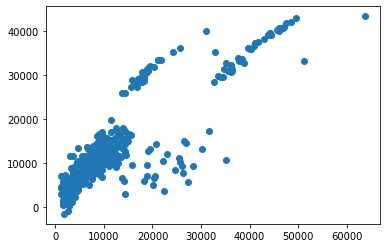

In [13]:
plt.scatter(Y_test,predictions)

In [14]:
from sklearn import metrics

In [15]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 4069.011586946191
MSE: 33764390.33773839
RMSE: 5810.713410394492


       0  1       2  3  4  5
0     19  0    27.9  0  1  3
1     18  1   33.77  1  0  2
2     28  1    33.0  3  0  2
3     33  1  22.705  0  0  1
4     32  1   28.88  0  0  1
...   .. ..     ... .. .. ..
1333  50  1   30.97  3  0  1
1334  18  0   31.92  0  0  0
1335  18  0   36.85  0  0  2
1336  21  0    25.8  0  0  3
1337  61  0   29.07  0  1  1

[1338 rows x 6 columns]
[0.20060309 0.1813664  0.16992314 0.16087702 0.15399424]
86.67638980741741
(1338, 6)
(1338, 5)
TRAINING PREDICTION SCORE : 0.7366969327839583
TESTING PREDICTION SCORE  : 0.7993609962127467


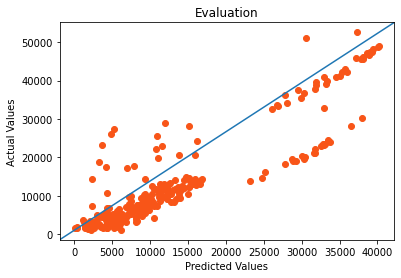

RMSE-RANDOM FOREST : 5650.46 (square-rooted)
R2-RANDOM FOREST   : 0.80
MSE-RANDOM FOREST  : 31927677.11 


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import math

#standardizing the feature
standardized = StandardScaler()
print(df1)
scaled_data = standardized.fit_transform(df1)
#determining the principal components
pca = PCA(n_components=5)
#feature reduction
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
#variance
ev = pca.explained_variance_ratio_
print(ev)
#visualization
print(sum(ev*100))
print(scaled_data.shape)
print(x_pca.shape)
#data model selection
x_data = x_pca
y_data = y
X_train,X_test,Y_train,Y_test = train_test_split(x_data,y_data,test_size=0.2,
                                                 random_state=0)
reg.fit(X_train,Y_train)
temp=reg.predict(X_test)
reg.score(X_test, Y_test)
print("TRAINING PREDICTION SCORE :",reg.score(X_train, Y_train))
print("TESTING PREDICTION SCORE  :",reg.score(X_test, Y_test))
fig, ax = plt.subplots()
ax.plot([0,1],[0,1], transform=ax.transAxes)
plt.scatter(temp, Y_test,c = '#F85518')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Evaluation")
plt.show()
# Evaluate prediction model using MSE
rf_mse = mean_squared_error(Y_test, temp)
print('RMSE-RANDOM FOREST : %.2f (square-rooted)' % math.sqrt(rf_mse))
# Evaluate prediction model using R2-Score
rf_r2 = r2_score(Y_test, temp)
print('R2-RANDOM FOREST   : %.2f' % rf_r2)
# Evaluate prediction model using MSE
rf_mse = mean_squared_error(Y_test, temp)
print('MSE-RANDOM FOREST  : %.2f ' % (rf_mse))